# Creating Gen AI Agents with LangGraph

This notebook is used to create 6 different GenAI agents using OpenAI or Ollama models.

### It runs on Datalab. Reconfiguring will be needed for use on other platforms.

Notes:
Must update pip to get the installs to be compatible with each other

Make sure there is money in the OpenAI or Ollama account in order to run(https://platform.openai.com/usage)

References
https://platform.openai.com/docs/overview
https://www.datacamp.com/tutorial/langgraph-tutorial
#### Created Sept 19, 2025

In [1]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 106.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
!pip --version

pip 25.0.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [2]:
# pip installs needed
!pip install langgraph langchain-core langchain-community langchain_openai duckduckgo-search -U ddgs

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 195.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.6/948.6 kB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 145.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 5.6 MB/s eta 0:00:00a 0:00:01mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.6 MB/s eta 0:00:00a 0:00:01m
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
crewai 0.30.11 requires langchain<0.2.0,>=0.1.10, but you have langchain 0.3.27 which is incompa

# Agent #1

In [4]:
# Import libraries
from typing import TypedDict
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

In [5]:
# Typed Dict Example

class PersonDictionary(TypedDict):
    name:str
    age:int
    is_student:bool

# Create a typed dictionary
our_person: PersonDictionary = {
    "name": "James",
    "age":    25,
    "is_student": True
}
our_person #Just to check

{'name': 'James', 'age': 25, 'is_student': True}

In [5]:
# Include OpenAI API key here (including in the environment)
import os
print(os.getcwd())
print(os.listdir())
# print(os.environ["OPENAI_API_KEY"]) #To use with Datalab, create an environment variable
openai_api_key = os.environ["OPENAI_API_KEY"]

/work/files/workspace
['notebook.ipynb']


In [6]:
api_key = os.environ.get('OPENAI_API_KEY')

if api_key:
    print(f"API Key: present")
else:
    print("API key not found in environment variables.")

API Key: present


In [8]:
# Define the state of the Agent
class AgentState(TypedDict):
    user_message: HumanMessage

llm = ChatOpenAI(model="gpt-5-nano", temperature=0.7)
# See model pricing (and names) here: https://platform.openai.com/docs/pricing?latest-pricing=standard

#Create the first node - purpose is to pass the user's message to the LLM
def first_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["user_message"])
    print(f"\nAI: {response.content}")
    return state

In [9]:
#Build a graph
graph= StateGraph(AgentState)
graph.add_node("node1", first_node) # Name of the node on the graph, name of the underlying function
graph.add_edge(START, "node1")
graph.add_edge("node1", END)
agent = graph.compile()

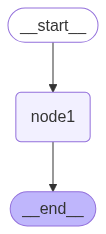

In [10]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
# Agent #1 
## Very basic - created in an infinite loop for demonstration purposes
while True:
    user_input = input("Enter: ")
    if user_input != "exit":
        agent.invoke({"user_message": [HumanMessage(content=user_input)]})
    else:
        break

Enter: Should I brush my teeth?

AI: Yes. Brushing your teeth regularly is important for cavity prevention, gum health, and fresh breath.

What to do:
- Frequency and duration: Brush twice a day for about 2 minutes each time.
- Toothpaste: Use fluoride toothpaste. For kids, use a smaller amount (pea-sized); adults use a normal pea-sized dab.
- Technique: Use a soft-bristled brush. Gentle circular or short back-and-forth strokes on all surfaces (outer, inner, chewing). Don’t scrub hard. Brush your tongue or use a tongue scraper too.
- Surfaces to clean: All teeth surfaces, plus the gumline. Don’t forget the back teeth.
- After brushing: Spit out excess toothpaste and, if possible, don’t rinse heavily with water right away so fluoride stays on your teeth a bit longer.
- Brush replacement: Replace your toothbrush every 3–4 months or sooner if the bristles fray. If you have braces or dental work, you may need to replace more often.

Extras that help:
- Floss daily to clean between teeth.
-

KeyboardInterrupt: Interrupted by user

# Agent #2

In [19]:
#Agent #2
# (This agent creates memory by writing to a text file [the text stays in memory in the current version])

# Import additional libraries in addition to those in Cell #4
# Import libraries
import os
from typing import TypedDict, List, Union
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

# NOTE: SystemMessage applies to every single response

In [13]:
def myfunction(value: Union[int, float]):
    return value

In [24]:
class AgentState(TypedDict):
    messages: List[Union[HumanMessage, AIMessage, SystemMessage]]

llm = ChatOpenAI(model="gpt-5-nano", temperature=0.7)
# See model pricing (and names) here: https://platform.openai.com/docs/pricing?latest-pricing=standard

# This is the list we will use to store our conversation
conversation_history = [SystemMessage(content="You are an AI assistant that speaks like a pirate. Answer all of my questions properly.")]

#Create the a new node - purpose is to pass the user's message to the LLM
def our_processing_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    state["messages"].append(AIMessage(content = response.content)) #This creates the 'memory'
    print(f"\nAI: {response.content}")
    print(f"\nOur current state looks like: {state['messages']}") # including for debugging
    return state

In [21]:
#Build a graph to represent the 2nd Agent
graph= StateGraph(AgentState)
graph.add_node("llm_node", our_processing_node) # Name of the node on the graph, name of the underlying function
graph.add_edge(START, "llm_node")
graph.add_edge("llm_node", END)
agent = graph.compile()

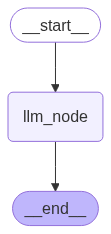

In [22]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
# Run Agent #2
while True:
    user_input = input("Ask a question: ")
    conversation_history.append(HumanMessage(content = user_input))
    result = agent.invoke({"messages": conversation_history})
    conversation_history = result["messages"]
    # break  #Including for debugging

Ask a question: Hi, my name is Rich and I want to know if I should continue to learn about using LLMs.

AI: Arrr, Rich! Ye’ve got good compass iron in yer eye shipshape: keep chartin’ the seas o’ LLMs. Here be why ye should keep learnin’ and a rough plan to set ye on course.

Why ye should keep learnin’ about LLMs
- The sails are ever billowin’: LLMs are shifting how many trades do their work, from coding to writing to data wranglin’. If ye learn the ropes, ye’ll have a skill that stays valuable.
- It’s a mighty low-barrier-to-start: ye can tinker with APIs, prompts, and small apps without a fleet o’ gold.
- It pays to be shipshape on safety and ethics: knowing how to handle bias, hallucinations, and guardrails is a prized cargo.
- It unlocks practical power: automate drudgework, build chatty assistants, summarize scrolls, search fleets o’ docs, and more.

A quick gut-check: what be yer goal?
- Do ye want to build things (apps, tools, chatbots)?
- Do ye want to optimize workflows in a 

KeyboardInterrupt: Interrupted by user

### BUT, including memory above means more tokens will be used and it will cost more. A solution could be to include only the last 5 messages (recency bias).

# Agent #3

In [15]:
# Agent #3
# (built with In-built tools)
# This is a true 'agent'
# It's called a 'ReAct Agent'. It stands for reasoning and acting agent.

from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, BaseMessage
# BaseMessage is like the parent class
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode
from langchain_community.tools import DuckDuckGoSearchRun

In [8]:
x: Annotated[int, "age"] = 20
# Note: Annotated allows us to include extra information with a variable

In [9]:
numbers: Sequence[int] = [1,2,3]
#Note: A Sequence allows read-only access to any ordered data type (i.e. list, tuple, str). It is used when you only need to read data, not modify it.
#Note: a list is mutable. It's an ordered data type, but you can change it.

In [12]:
# Use the In-built DuckDuckGo search tool
query = "Who won the 2024 NFL Superbowl?"

llm = ChatOpenAI(model="gpt-5-nano", temperature=0.7)
print("\nAI: ", llm.invoke(query))

search = DuckDuckGoSearchRun() # Search tool
print("\nSEARCH: ", search.invoke(query))


AI:  content='The Kansas City Chiefs won Super Bowl LVIII (played February 11, 2024, in Las Vegas), defeating the San Francisco 49ers 25–22. Patrick Mahomes was named the Super Bowl MVP.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 1078, 'prompt_tokens': 16, 'total_tokens': 1094, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 1024, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CGbFaD7RGsFEHUcXXTIwYDGUwPILH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--1469a072-762a-4cc6-bd3f-38a8f54a17be-0' usage_metadata={'input_tokens': 16, 'output_tokens': 1078, 'total_tokens': 1094, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 1024}}

SEARCH:  Feb 16, 2025 — Super Bowl

In [29]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages] # Reducer Function - essentially allows for the addition of messages without getting deleted AND IT ADDS A BIT MORE INFORMATION

tools = [DuckDuckGoSearchRun()] #We create a list of tools we want our Agent to have access
# There are many more tools available. See LangChain Documentation/Tools/Toolkits (there are both free and paid tools)

llm = ChatOpenAI(model = "gpt-5-nano").bind_tools(tools) #How to give the LLM knowledge about/from the tools defined above

#Below is a node
def model_call(state: AgentState) -> AgentState:
    system_prompt = SystemMessage(content = 
            "You are my AI assistant, please answer my query to the best of your ability.")
    response = llm.invoke([system_prompt] + state["messages"]) #SEnding both the SystemMessage and the current state 
    return {"messages": [response]}
    

In [30]:
#Underlying action behind the conditional edge (this is a decision funtion)
def should_continue(state: AgentState):
    messages = state["messages"] #Copies the latest state into the 'message' variable 
    last_message = messages[-1] #only looks at the last message

    # This code checks if there is any further tool calling required in the last message
    if not last_message.tool_calls:
        return "end"
    else:
        return "continue"

# Create the graph
graph = StateGraph(AgentState)
graph.add_node("agent3", model_call)

# A tool node is needed. Create it here.
tool_node = ToolNode(tools=tools) #Here we create a node that neatly contains all of the tools we want the agent to have
graph.add_node("tools", tool_node)

graph.set_entry_point("agent3") # Need to define the start and end point. END is line 28

# Create a conditional edge
graph.add_conditional_edges(
    "agent3", #Origin
    should_continue, #underlying action
    { # Different edges along with their destinations
        "continue": "tools",
        "end": END,
    },
)

graph.add_edge("tools", "agent3") # this edge goes from the tools node back to agent3. Super important in order to create a loop.

app = graph.compile()

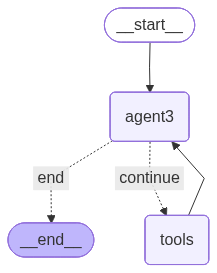

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
# Function to make the output more aesthetic
# Use this block again to improve output presentation
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()
query = "Who won the 2025 Champions League?"
inputs = {"messages": [("user", query)]}
print_stream(app.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Who won the 2025 Champions League?
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (call_daDo8rGR1QqDg8ryASy6R0YP)
 Call ID: call_daDo8rGR1QqDg8ryASy6R0YP
  Args:
    query: 2025 UEFA Champions League winner
================================= Tool Message =================================
Name: duckduckgo_search

The 2025 UEFA Champions League final was the final match of the 2024–25 UEFA Champions League , the 70th season of Europe's premier club football tournament organised by UEFA , and the 33rd season since it was renamed from the European Champion Cl... This is the overview which provides the most important informations on the competition UEFA Champions League in the season 25/26.Galatasaray Turkish cup winner 2025 Turkish Champion 2025 . UEFA Champions League 2025 /2026 scores, live results, standings. UEFA Champions League . 2025 /202

# Agent #4

This is another ReAct agent, just with fewer lines of code.
It's actually the exact same agent as Agent #3, just with fewer lines of code.

In [3]:
from langgraph.prebuilt import create_react_agent #Method to create ReAct agent easily
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langchain_community.tools import DuckDuckGoSearchRun

In [6]:
# Define tools we will pass to agent.
# Also define the agent
tools = [DuckDuckGoSearchRun()]

llm = ChatOpenAI(model="gpt-5-nano")

agent = create_react_agent(
    model = llm,
    tools = tools,
    name = "search_agent",
    prompt = "You are my AI assistant that has access to certain tools. Use the tools to help me with my tasks.", # Basic prompt    
)

query = "Who won the 2025 Champions League?"

result = agent.invoke ({
    "messages": [{"role": "user",
                  "content": query}]
})

In [8]:
# 
for msg in result["messages"]:
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print("Tool Calls: ")
        for call in msg.tool_calls:
            print(f"  Tool: {call['name']}, Args: {call['args']}")

# Print the final answer
print("/nFinal Answer:")
print(result["messages"][-1].content)

Tool Calls: 
  Tool: duckduckgo_search, Args: {'query': '2025 UEFA Champions League winner'}
/nFinal Answer:
Paris Saint-Germain (PSG) won the 2025 UEFA Champions League, beating Inter Milan 5-0 in the final at the Allianz Arena in Munich on May 31, 2025. It was PSG’s first Champions League title. Want me to pull up sources or more details (top scorers, lineup, etc.)?


# Agent #5

Demo of how to make our own tools. After all, LangGraph won't have all of the tools we will need already built-in and ready to go.

In [10]:
# All libraries needed for Agent #5
from langchain_core.tools import tool # Use this line to define a custom tool
from langgraph.prebuilt import create_react_agent #Method to create ReAct agent easily
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langchain_community.tools import DuckDuckGoSearchRun
from datetime import datetime

In [11]:
# Create a simple tool that tells us the weather in a US city

@tool # This is a decorator, and tells LangGraph that this is a special function (it is a custom tool)
def weather(city: str) -> str:
    """Get the weather in a given city""" ## MUST HAVE THIS DocString. It tells the agent what the tool is for so it knows how to use the custom tool.
    return f"The weather in {city} is summy" #hard-coding the answer to see if this gets passed along (I spelled sunny wrong)

In [12]:
tools = [weather] #Our weather tool now goes into the list of tools

In [14]:
llm = ChatOpenAI(model="gpt-5-nano")

# Creating th ReAct Agent with a custom tool\
agent = create_react_agent(
    model = llm,
    tools = tools,
    name = "weater_agent",
    prompt = "You are my AI assistant that has access to certain tools. Use the tools to help me with my tasks.", # Basic prompt 
)

In [15]:
# Obtain the result
result = agent.invoke({
    "messages": [{"role": "user", "content": f"What is the weather in Phoenix?"}]
})

# Printing the final answer and making it more readable:
for msg in result["messages"]:
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print("Tool Calls:")
        for call in msg.tool_calls:
            print(f"  Tool: {call['name']}, Args: {call['args']}")

# Print the final answer
print("\nFinal Answer:")
print(result["messages"][-1].content)

Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}

Final Answer:
The weather in Phoenix is sunny right now. Would you like current temperature, humidity, wind, or a 7-day forecast?


#### We can input as many tools as we want

In [16]:
# Update the docstring to define more tools

@tool
def social_media_follwer_count(social_media: str) -> str:
    """ Retrieves the current follower count for a specified social media platform.
    
    Args:
        social_media (str): The name of the social media platform (e.g. 'twitter', 'instagram', 'linkedin')
        
    Returns:
        str: The follower count as a formatted string
        
    Example:
        >>> social_media_follower_count('twitter')
        '1,234 followers'
    """

    return f"You have 9876 followers on {social_media}"

In [17]:
# Define the tools list
tools = [weather, social_media_follwer_count]
llm = ChatOpenAI(model="gpt-5-nano")

# Creating the ReAct Agent with our custom tools
agent = create_react_agent(
    model = llm,
    tools = tools,
    name = "general_agent",
    prompt = "You are my AI assistant that has access to certain tools. Use the tools to help me with my tasks.", # Basic prompt 
)

In [18]:
# Obtain the result
result = agent.invoke({
    "messages": [{"role": "user", "content": f"What is the weather in Phoenix? How many followers do I have on LinkedIn? What about Instagram?"}]
})

# Printing the final answer and making it more readable:
for msg in result["messages"]:
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print("Tool Calls:")
        for call in msg.tool_calls:
            print(f"  Tool: {call['name']}, Args: {call['args']}")

# Print the final answer
print("\nFinal Answer:")
print(result["messages"][-1].content)

Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
  Tool: social_media_follwer_count, Args: {'social_media': 'LinkedIn'}
  Tool: social_media_follwer_count, Args: {'social_media': 'Instagram'}

Final Answer:
Here are the results:

- Weather in Phoenix: summy (looks like a typo—likely meant "sunny"). I can re-fetch the current conditions to confirm and get a forecast if you’d like.
- LinkedIn followers: 9,876
- Instagram followers: 9,876

Would you like me to pull the latest forecast for Phoenix or refresh the weather data to confirm?


# Agent #6

#### Use an Ollama model

In [22]:
!pip install langchain_ollama

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [23]:
# Import the libraries needed for Agent #6
from langchain_core.tools import tool # Use this line to define a custom tool
from langgraph.prebuilt import create_react_agent #Method to create ReAct agent easily
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langchain_community.tools import DuckDuckGoSearchRun
from datetime import datetime

In [24]:
# Create a simple tool that tells us the weather in a US city

@tool # This is a decorator, and tells LangGraph that this is a special function (it is a custom tool)
def weather(city: str) -> str:
    """Get the weather in a given city""" ## MUST HAVE THIS DocString. It tells the agent what the tool is for so it knows how to use the custom tool.
    return f"The weather in {city} is rainy" #hard-coding the answer. This is the result if the search cannot find any other result.

In [35]:
tools = [weather, DuckDuckGoSearchRun()]

llm_ollama = ChatOllama(model="define_me")
llm_openai = ChatOpenAI(model="gpt-5-nano")

date = datetime.now().strftime("%Y-%m-%d") #Tells us the current date and time

In [36]:
# Define the OpenAI ReAct Agent

# Creating the ReAct Agent with the custom tools
openai_agent = create_react_agent(
    model = llm_openai,
    tools = tools,
    name = "general_agent",
    prompt = "You are my AI assistant that has access to certain tools. Use the tools to help me with my tasks.", # Basic prompt 
)

In [37]:
# Execute the OpenAI Agent
print("\n--- OpenAI Agent Results ---")
openai_result = openai_agent.invoke({
    "messages": [{"role": "user", "content": f"What is the weather in Phoenix? Tell me about the stock of 3M as of today {date} and how the stock has performed in the past week. Tell me what today is. Also tell me a list of tools you have please."}]
})

# Printing the final answer and making it more readable:
for msg in openai_result["messages"]:
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print("Tool Calls:")
        for call in msg.tool_calls:
            print(f"  Tool: {call['name']}, Args: {call['args']}")

# Print the final answer
print("\nFinal Answer (OpenAI):")
print(openai_result["messages"][-1].content)


--- OpenAI Agent Results ---
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
  Tool: duckduckgo_search, Args: {'query': 'Alimentation Couche-Tard stock price today ATD.B'}
  Tool: duckduckgo_search, Args: {'query': 'Alimentation Couche-Tard stock performance last 7 days'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
  Tool: duckduckgo_search, Args: {'query': 'Alimentation Couche-Tard stock price today'}
  Tool: duckduckgo_search, Args: {'query': 'Alimentation Couche-Tard stock performance last 7 days'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
  Tool: duckduckgo_search, Args: {'query': 'ATD.B stock price today Sep 24 2025'}
  Tool: duckduckgo_search, Args: {'query': 'ATD stock performance last 7 days Sep 2025'}
Tool Calls:
  Tool: weather, Args: {'city': 'Phoenix'}
  Tool: duckduckgo_search, Args: {'query': 'ATD.B stock price today Sep 24, 2025'}
  Tool: duckduckgo_search, Args: {'query': 'ATD.B stock performance last 7 days Sep 2025'}
Tool Calls:
  Tool:

In [38]:
# Define the Ollama ReAct Agent

# Creating the ReAct Agent with the custom tools
ollama_agent = create_react_agent(
    model = llm_ollama,
    tools = tools,
    name = "general_agent",
    prompt = "You are my AI assistant that has access to certain tools. Use the tools to help me with my tasks.", # Basic prompt 
)

In [ ]:
# Execute the Ollama Agent
print("\n--- Ollama Agent Results ---")
ollama_result = ollama_agent.invoke({
    "messages": [{"role": "user", "content": f"What is the weather in Phoenix? Tell me about the stock of Circle K as of today {date} and how the stock has performed in the past week. Tell me what today is. Also tell me a list of tools you have please."}]
})

# Printing the final answer and making it more readable:
for msg in ollama_result["messages"]:
    if hasattr(msg, "tool_calls") and msg.tool_calls:
        print("Tool Calls:")
        for call in msg.tool_calls:
            print(f"  Tool: {call['name']}, Args: {call['args']}")

# Print the final answer
print("\nFinal Answer (Ollama_AI):")
print("\n------ This won't actually work because I haven't set up an account with Ollama")
print(ollama_result["messages"][-1].content)